# Unit 4 Capstone for Unsupervised Learning: Corpus Clustering and Classification

Purpose:  
Import 10 texts from 10 different authors and determine the best unsupervised learning methods to identify/predict the correct author given a subset of words.

Methodology: Import 10 texts and clean them. Then reduce the text into paragraphs, isolate the 2000 most common vocabulary words, and combine them all into a large dataset. Then, identify which of the clustering methods learned in this course are able to determine the author of the works the best. Next, we would identify the highest accuracy of info using the supervised learning regresison models, checking against the known authors.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.style.use('bmh')
# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.metrics import pairwise_distances
# For NLP
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import string
# For Regression Analysis
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


# Data Cleaning

In [2]:
# reading in the data, this time in the form of paragraphs
persuasion = gutenberg.paras('austen-persuasion.txt')
alice = gutenberg.paras('carroll-alice.txt')
stories = gutenberg.paras('bryant-stories.txt')
bb = gutenberg.paras('burgess-busterbrown.txt')
thur = gutenberg.paras('chesterton-thursday.txt')
parents = gutenberg.paras('edgeworth-parents.txt')
macbeth = gutenberg.paras('shakespeare-macbeth.txt')
leaves = gutenberg.paras('whitman-leaves.txt')
poems = gutenberg.paras('blake-poems.txt')
moby = gutenberg.paras('melville-moby_dick.txt')

# processing
def process(text):
    text_para = []
    for paragraph in text:
        para = paragraph[0]
        # removing the double-dash from all words
        para = [re.sub(r'--', '', word) for word in para]
        para = [re.sub("[\[].*?[\]]", "", word)for word in para]
        # The Chapter indicator is idiosyncratic
        para = [re.sub(r'Chapter \d+', '', word) for word in para]
        para = [re.sub(r'CHAPTER .*', '', word) for word in para]
        # Forming each paragraph into a string and adding it to the list of strings.
        text_para.append(' '.join(para))
    return text_para

In [3]:
# Run texts through the processor
persuasion_para = process(persuasion)
alice_para = process(alice)
stories_para = process(stories)
bb_para = process(bb)
thur_para = process(thur)
parents_para = process(parents)
macbeth_para = process(macbeth)
leaves_para = process(leaves)
poems_para = process(poems)
moby_para = process(moby)

all_para = persuasion_para + alice_para + stories_para + bb_para + \
    thur_para + parents_para + macbeth_para + \
    leaves_para + poems_para + moby_para

In [4]:
# Now do count vectorization with stop word removal
# Will automatically compute unique vocab
cv = CountVectorizer(stop_words='english', max_features=2000)
y = ['Carrol'] * len(alice_para) + ['Austen'] * len(persuasion_para) + ['Bryant'] * len(stories_para) + ['Burgess'] * len(bb_para) + ['Chesterton'] * len(thur_para) + \
    ['Edgeworth'] * len(parents_para) + ['Shakespeare'] * len(macbeth_para) + ['Whitman'] * \
    len(leaves_para) + ['Blake'] * \
    len(poems_para) + ['Melville'] * len(moby_para)

In [5]:
X = cv.fit_transform(all_para).toarray()
print(X.shape)  # Number of sentences by number of vocab terms
vocab_dict = cv.vocabulary_  # Gets you a mapping of term to column index

(14556, 2000)


In [6]:
# do later
# alice = None
# persuasion = None
# alice_lemmas = None


# K-Means

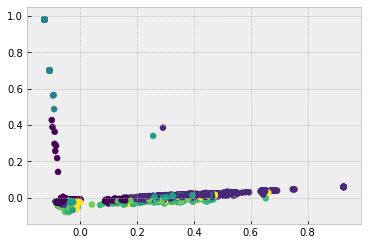

In [7]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca_2 = PCA(2).fit_transform(X_norm)
X_pca_10 = PCA(10).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca_10)

# Plot the solution.
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y_pred)
plt.show()

In [8]:
y = np.array(y)

In [9]:
# # Check the solution against the data.
X_norm = None

crosstab = np.zeros((len(np.unique(y)), len(np.unique(y_pred))))
row_name = np.unique(y)
col_name = np.unique(y_pred)

for idx1, key1 in enumerate(row_name):
    for idx2, key2 in enumerate(col_name):
        crosstab[idx1, idx2] = len(y[(y==key1) & (y_pred==key2)])

crosstab_df = pd.DataFrame(crosstab, index=row_name, columns=col_name)

In [10]:
crosstab_df

,0,1,2,3,4,5,6,7,8,9
Austen,617.0,259.0,17.0,0.0,15.0,6.0,58.0,6.0,5.0,49.0
Blake,234.0,4.0,4.0,0.0,0.0,0.0,28.0,9.0,0.0,5.0
Bryant,669.0,184.0,16.0,0.0,0.0,0.0,254.0,53.0,2.0,16.0
Burgess,177.0,10.0,2.0,0.0,0.0,0.0,60.0,4.0,3.0,10.0
Carrol,598.0,55.0,20.0,0.0,21.0,40.0,43.0,19.0,4.0,17.0
Chesterton,785.0,343.0,11.0,0.0,15.0,9.0,29.0,68.0,7.0,21.0
Edgeworth,2484.0,572.0,81.0,0.0,10.0,127.0,148.0,102.0,74.0,128.0
Melville,2132.0,127.0,32.0,0.0,136.0,90.0,55.0,177.0,8.0,36.0
Shakespeare,554.0,0.0,0.0,115.0,0.0,0.0,2.0,5.0,0.0,2.0
Whitman,2214.0,10.0,0.0,0.0,0.0,0.0,38.0,162.0,5.0,49.0


# Mini Batch

In [11]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=10,
    batch_size=200)
minibatchkmeans.fit(X_pca_10)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca_10)

In [12]:
# Check the MiniBatch model against our earlier one.
print('Comparing MiniBatch to ones in data')
crosstab = np.zeros((len(np.unique(y)), len(np.unique(predict_mini))))
row_name = np.unique(y)
col_name = np.unique(predict_mini)

for idx1, key1 in enumerate(row_name):
    for idx2, key2 in enumerate(col_name):
        crosstab[idx1, idx2] = len(y[(y==key1) & (predict_mini==key2)])

crosstab_df = pd.DataFrame(crosstab, index=row_name, columns=col_name)
crosstab_df

Comparing MiniBatch to ones in data


,0,1,2,3,4,5,6,7,8,9
Austen,48.0,59.0,8.0,261.0,0.0,37.0,3.0,94.0,45.0,477.0
Blake,5.0,28.0,9.0,4.0,0.0,7.0,0.0,23.0,7.0,201.0
Bryant,14.0,253.0,56.0,186.0,0.0,20.0,10.0,44.0,20.0,591.0
Burgess,9.0,61.0,5.0,10.0,0.0,2.0,0.0,8.0,3.0,168.0
Carrol,17.0,43.0,26.0,58.0,0.0,80.0,0.0,222.0,29.0,342.0
Chesterton,17.0,28.0,72.0,355.0,0.0,29.0,7.0,156.0,22.0,602.0
Edgeworth,122.0,153.0,123.0,633.0,0.0,166.0,0.0,722.0,100.0,1707.0
Melville,33.0,51.0,175.0,131.0,0.0,249.0,378.0,89.0,57.0,1630.0
Shakespeare,2.0,2.0,5.0,0.0,115.0,0.0,0.0,88.0,1.0,465.0
Whitman,53.0,41.0,206.0,10.0,0.0,0.0,17.0,216.0,59.0,1876.0


# Mean Shift

In [13]:
#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

In [ ]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

In [ ]:
short_y = y[0:len(labels)]

In [ ]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
# plt.show()

print('Comparing the assigned categories to the ones in the data:')
crosstab = np.zeros((len(np.unique(short_y)), len(np.unique(labels))))
row_name = np.unique(short_y)
col_name = np.unique(labels)

for idx1, key1 in enumerate(row_name):
    for idx2, key2 in enumerate(col_name):
        crosstab[idx1, idx2] = len(short_y[(short_y==key1) & (labels==key2)])

crosstab_df = pd.DataFrame(crosstab, index=row_name, columns=col_name)
crosstab_df

# Seems like the K Means Mini Batch clustering is working the best

# Adjusted Rand Index

In [15]:
metrics.adjusted_rand_score(y, y_pred)

0.016157968537690297

# Random Forest

In [16]:
rfc = ensemble.RandomForestClassifier()
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9009801227443437

Test set score: 0.6166529266281946


# Logistic Regression

In [17]:
lr = LogisticRegression()
train = lr.fit(X_train, y_train)
# print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

Training set score: 0.8049830539525511

Test set score: 0.7109095905468535


# Gradient Boosting

In [ ]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

In [18]:
cross_val_score(lr, X, y, cv=5)

array([0.54320988, 0.65785861, 0.63839286, 0.61554333, 0.58121129])

# Unsupervised NLP
Use LSA to prepare text data for classification in supervised learning. In that case, the goal would be to use LSA to arrive at a smaller set of features that can be used to build a supervised model that will classify text into pre-labelled categories.

In [19]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test = train_test_split(all_para, test_size=0.25, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
all_paras_tfidf=vectorizer.fit_transform(all_para)
print("Number of features: %d" % all_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(all_paras_tfidf, test_size=0.25, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 10554
Original sentence: To this speech Mr . Somerville made no answer , but turned away to look at the bow window of a handsome new inn , which the glazier was at this instant glazing .
Tf_idf vector: {'glazier': 0.3799373133912812, 'somerville': 0.3001458712816921, 'bow': 0.27060702750491933, 'instant': 0.26202049175557457, 'inn': 0.2919444086605154, 'window': 0.2593043801119187, 'speech': 0.28641186105575345, 'new': 0.2201892854462231, 'answer': 0.2537930159494784, 'away': 0.20032983203458532, 'look': 0.2041166476556295, 'mr': 0.19445875919531996, 'handsome': 0.3128990823610265, 'turned': 0.24241540869037054}


In [20]:
# Dimension reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1232 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 24.470159385061947
Component 0:
CHAPTER 131    0.999635
CHAPTER 56     0.999635
CHAPTER 110    0.999635
CHAPTER 127    0.999635
CHAPTER 124    0.999635
CHAPTER 87     0.999635
CHAPTER 78     0.999635
CHAPTER V      0.999635
CHAPTER 82     0.999635
CHAPTER 2      0.999635
Name: 0, dtype: float64
Component 1:
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Macb .    1.0
Name: 1, dtype: float64
Component 2:
" Oh , at Harrow ," said the policeman                                                                          0.887492
" Oh , they ," said the new detective contemptuously ; " no they are not a very valuable force .                0.879312
" Oh , please , mighty and kindly Elephant ," he said , making a very low bow , " will you do me a favour ?"    0.875396
" Oh , perhaps you hav ' n ' t got any ," he said quickly .                                               

In [21]:
# same model, only with the test set data. 
#Reshapes the vectorizer output into something people can read
X_test_tfidf_csr = X_test_tfidf.tocsr()

#number of paragraphs
n = X_test_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_test_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_test_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_test[5])
print('Tf_idf vector:', tfidf_bypara[5])

Original sentence: " That ' s what he never did yet ," said the carpenter .
Tf_idf vector: {'carpenter': 0.7786448870456927, 'said': 0.33553186594843437, 'did': 0.5302174146619123}


In [22]:
#Our SVD data reducer.  We are going to reduce the feature space from 1232 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the test data, then project the test data.
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

# #Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
# paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
# for i in range(5):
#     print('Component {}:'.format(i))
#     print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 26.04558747386151


# See if the unsupervised NLP work helped us 

In [23]:
lr = LogisticRegression()
train = lr.fit(X_train_lsa, y_train)
# print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train_lsa, y_train))
print('\nTest set score:', lr.score(X_test_lsa, y_test))

Training set score: 0.26261793533021893

Test set score: 0.22423742786479803


# Results
__The best Clustering Method:__ K Means Minibatch  
__The best Supervised Learning Regression  Model:__ Logistic Regression  
__The best accuracy score:__   
Logistic Regression on the paragraph-grouped text data for 10 different authors, minus stop words and punctuation, isolating the top 2000 most common vocabulary words within the paragraphs.  
Reminder, the __Accuracy Score Results for LR:__  
Training set score: 0.8049830539525511  
Test set score: 0.7109095905468535  